<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%A7%91%EA%B0%92%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

1. train.csv : 학습 데이터
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)


2.test.csv
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 


3.sample_submission.csv 
- id : 데이터 고유 id
- target : 집값(달러 단위)

In [54]:
train=pd.read_csv("/content/drive/MyDrive/housing/train.csv")
test=pd.read_csv("/content/drive/MyDrive/housing/test.csv")
sample=pd.read_csv('/content/drive/MyDrive/housing/sample_submission.csv')

In [55]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [56]:
test.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


## EDA

In [43]:
train.columns

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

In [44]:
train.select_dtypes('object').columns.tolist()


['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

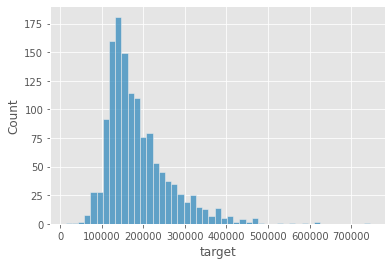

In [45]:
sns.histplot(data=train,x='target')

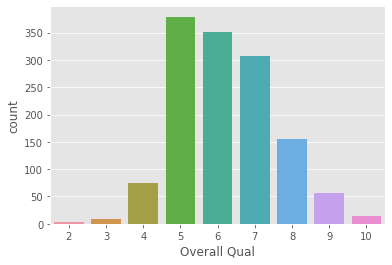

In [ ]:
#전반적 재료와 마감 품질
sns.countplot(data=train,x='Overall Qual')

5값이 가장 많다. 그리고 1은 없나보다. 2가 가장 작다. 

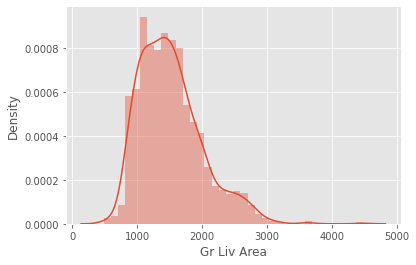

In [ ]:
#지상층 생활면적은 거의 1000에서 2000사이에 분포
sns.distplot(train['Gr Liv Area'])

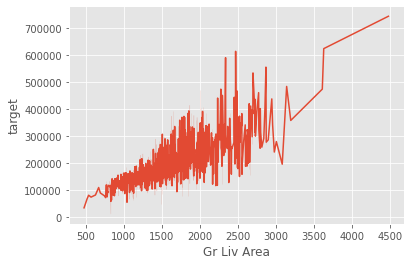

In [ ]:
#지상층 생활 면적
sns.lineplot(data=train,
             x='Gr Liv Area',
             y='target')

target값하고 어느정도 관련이 있어보인다. 

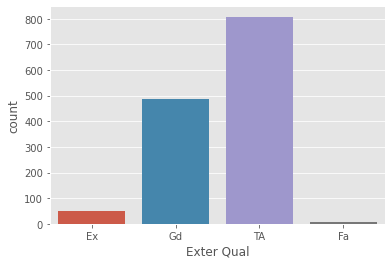

In [ ]:
#외관 재료 품질
sns.countplot(data=train,x='Exter Qual')

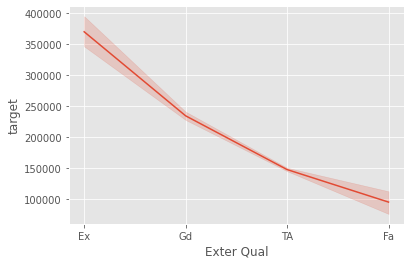

In [ ]:
#외관재료 품질에 따른 집값 확인
sns.lineplot(data=train,
             x='Exter Qual',
             y='target')


Ex일떄 집값이 가장 비싸고, Fa일때 집값이 안비쌈

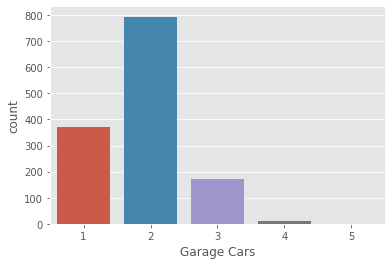

In [ ]:
#차고 자리 개수
sns.countplot(data=train,x='Garage Cars')

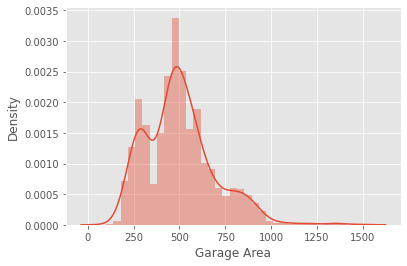

In [ ]:
#차고 면적
sns.distplot(train['Garage Area'])

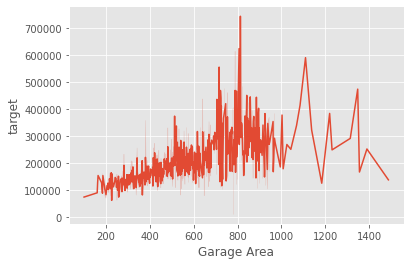

In [ ]:
sns.lineplot(data=train,
             x='Garage Area',
             y='target')

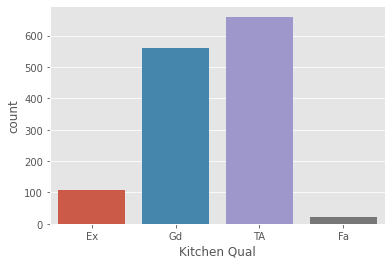

In [ ]:
#부억 품질
sns.countplot(data=train,x='Kitchen Qual')

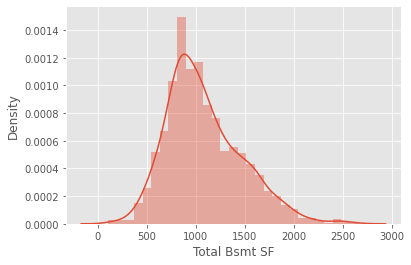

In [ ]:
#지하실 면적
sns.distplot(train['Total Bsmt SF'])

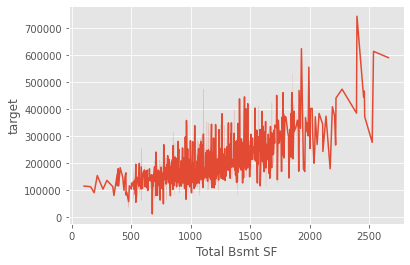

In [ ]:
#지하실 면적
sns.lineplot(data=train,
             x='Total Bsmt SF',
             y='target')

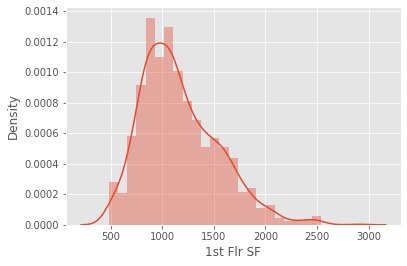

In [ ]:
#1층 면적
sns.distplot(train['1st Flr SF'])

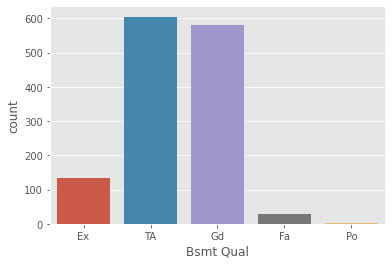

In [ ]:
#지하실 높이
sns.countplot(train['Bsmt Qual'])

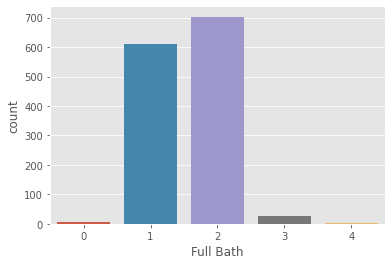

In [ ]:
#지상층 화장실 개수
sns.countplot(train['Full Bath'])

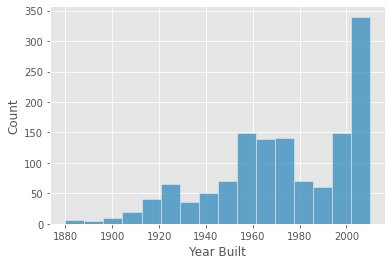

In [ ]:
#완공연도
sns.histplot(train['Year Built'])

In [ ]:
train['Year Built'].value_counts()

2005    71
2006    63
2003    48
2007    48
2004    48
        ..
1919     1
1892     1
2010     1
1917     1
1912     1
Name: Year Built, Length: 105, dtype: int64

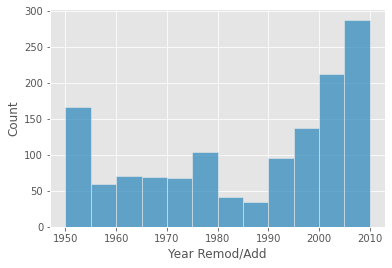

In [ ]:
#리모델링 연도
sns.histplot(train['Year Remod/Add'])

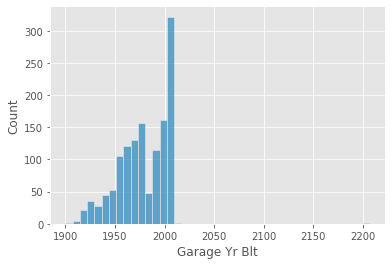

In [ ]:
#차고 완공 연도
sns.histplot(train['Garage Yr Blt'])

뭔가 이상치가 있는 것 같다. 싸늘하다

In [ ]:
train['Garage Yr Blt'].value_counts()

2005    70
2006    53
2007    51
2004    50
2003    49
        ..
1919     1
2010     1
1924     1
1923     1
1929     1
Name: Garage Yr Blt, Length: 97, dtype: int64

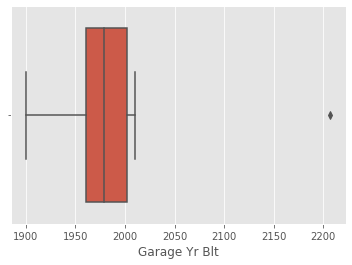

In [ ]:
sns.boxplot(train['Garage Yr Blt'])

제거해버려야지

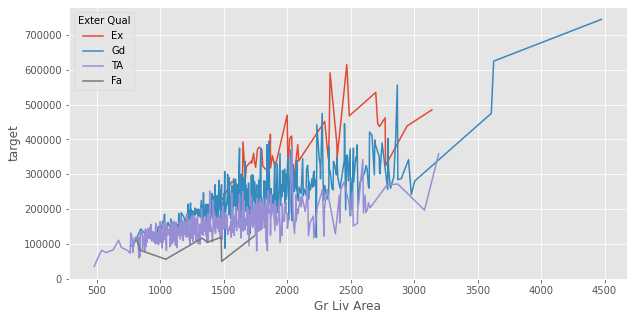

In [ ]:

plt.figure(figsize=(10,5))
sns.lineplot(data=train,
             x='Gr Liv Area',
             y='target',
             hue='Exter Qual',#외관 재료 품질
             legend='full',ci=None)

외관 재료 품질과 지상층 생활면적에 따른 집값 분포를 확인해보았다. 대부분의 외관 재료는 Gd로 만들어졌으며 외관이 EX로 만들어졌을 때 집값이 비싼 것을 볼 수 있었다.

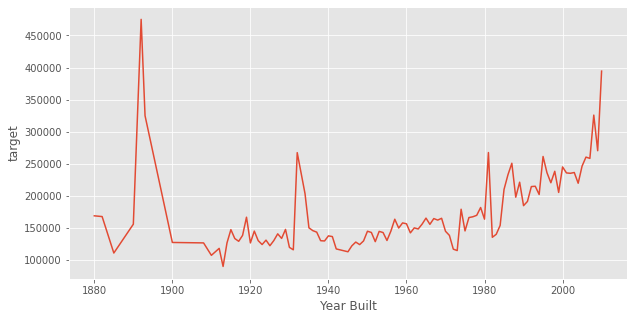

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train,
             x='Year Built',
             y='target',
             legend='full',ci=None)

1880년과 1900년 사이에 집값이 엄청 비쌌다가 점점 집값이 비싸지는 추세를 볼 수 있다.

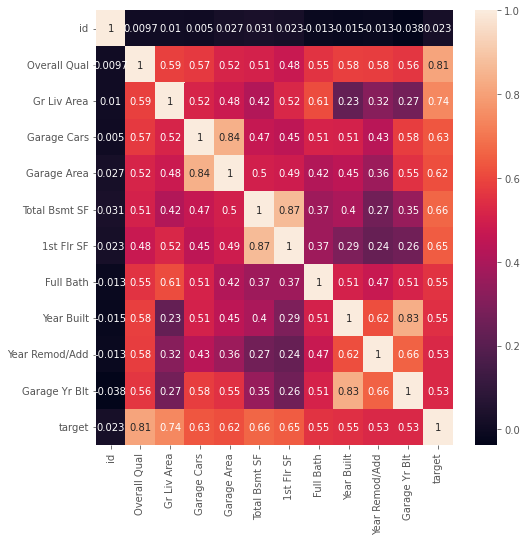

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot=True)

피처들간의 상관관계가 높은 걸 보니 다중공선성문제가 일어날 수 있음. 다중공선성 문제를 해결하려면..?
이상치를 제거해볼까?

## 데이터 전처리

### 1) 이상치 제거 Garage Yr Blt

In [58]:
#Garage Yr Blt이상치 제거
#가장 많은 값인 2005년으로 바꿔주었다.
train.loc[train['Garage Yr Blt']==2207,'Garage Yr Blt']=2007

In [59]:
train['Garage Yr Blt'].max()

2010

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


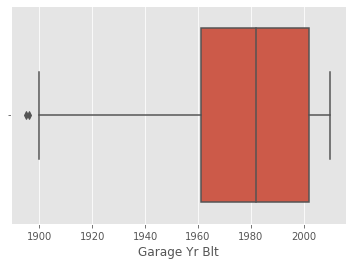

In [61]:
sns.boxplot(data=test,x='Garage Yr Blt')

In [138]:
test.loc[test['Garage Yr Blt']<1900]

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
1035,1036,4,952,Fa,1,330,TA,756,952,TA,1,1896,1950,1896
1286,1287,4,1361,TA,1,185,TA,173,825,Po,1,1895,1950,1895


### 2) object값을 category로 변환



In [62]:
train.select_dtypes('object').columns.tolist()

['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

In [63]:
cat=['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

In [64]:
train.select_dtypes('int').columns.tolist()

['id',
 'Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Full Bath',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt',
 'target']

In [65]:
#id는 없앨거니까 삭제
num=[
 'Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Full Bath',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt']

In [66]:
cat=['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']

for col in cat:
  train[col]=train[col].astype('category')
  test[col]=test[col].astype('category')

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              1350 non-null   int64   
 1   Overall Qual    1350 non-null   int64   
 2   Gr Liv Area     1350 non-null   int64   
 3   Exter Qual      1350 non-null   category
 4   Garage Cars     1350 non-null   int64   
 5   Garage Area     1350 non-null   int64   
 6   Kitchen Qual    1350 non-null   category
 7   Total Bsmt SF   1350 non-null   int64   
 8   1st Flr SF      1350 non-null   int64   
 9   Bsmt Qual       1350 non-null   category
 10  Full Bath       1350 non-null   int64   
 11  Year Built      1350 non-null   int64   
 12  Year Remod/Add  1350 non-null   int64   
 13  Garage Yr Blt   1350 non-null   int64   
 14  target          1350 non-null   int64   
dtypes: category(3), int64(12)
memory usage: 131.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13

In [67]:
#category형 변수 숫자로 변환

mapping={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}

for col in cat:
  train[col]=train[col].map(mapping)
  test[col]=test[col].map(mapping)


### 3) 이상치 제거

In [68]:
def outlier(df=None,column=None,weight=1.5):

  #column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함. 
  data=df[column]
  quantile_25=np.percentile(data.values,25)
  quantile_75=np.percentile(data.values,75)

  #IQR 구하고 IQR에 1.5를 곲해 최댓값과 최솟값 지점 구하기
  iqr=quantile_75-quantile_25
  iqr_weight=iqr*weight
  lowest_val=quantile_25-iqr_weight#이상치 최소 기준
  highest_val=quantile_75+iqr_weight#이상치 최대 기준

  #최댓값보다 크거나 최솟값보다 작은 값을 아웃라이어로 설정하고  DataFrame index 반환. 
  outlier_index=data[(data < lowest_val) | (data > highest_val)].index

  return outlier_index

In [69]:
outlier_index={}

for i,colName in enumerate(num):
  outlier_index[i]=outlier(df=train,column=f'{colName}',weight=1.5)
  
outlier_index


{0: Int64Index([], dtype='int64'),
 1: Int64Index([  18,   94,  110,  132,  201,  297,  462,  476,  586,  663,  677,
              683,  686,  735,  747,  752,  816,  856,  864,  939,  941,  948,
              962, 1087, 1098, 1138, 1258, 1264, 1346],
            dtype='int64'),
 2: Int64Index([93, 297, 398, 503, 718, 735, 812, 939, 1010, 1163, 1173, 1228], dtype='int64'),
 3: Int64Index([   0,    4,   42,   90,  118,  242,  282,  297,  327,  377,  380,
              503,  511,  660,  664,  721,  732,  839,  859,  934,  973, 1002,
             1006, 1010, 1055, 1113, 1163, 1173, 1185, 1194, 1212, 1230, 1241,
             1251, 1259, 1298],
            dtype='int64'),
 4: Int64Index([   0,    7,  163,  263,  273,  327,  380,  628,  732,  745,  856,
              871,  942, 1002, 1034, 1101, 1221, 1298, 1311],
            dtype='int64'),
 5: Int64Index([   0,    7,  163,  263,  665,  732,  745,  811,  856,  871, 1002,
             1034, 1098, 1149, 1161, 1191, 1221, 1311],
            dt

 0번째와 8번째 즉, Overall Qual, Year Remod/Add 변수는 이상치가 없다.

In [70]:
#각각의 숫자들 리스트 안에 넣기
outlier_list=[]

for i in range(len(outlier_index)):
  if list(outlier_index[i].values)==[]:
    continue
  outlier_list.append(list(outlier_index[i].values))
print(outlier_list)

[[18, 94, 110, 132, 201, 297, 462, 476, 586, 663, 677, 683, 686, 735, 747, 752, 816, 856, 864, 939, 941, 948, 962, 1087, 1098, 1138, 1258, 1264, 1346], [93, 297, 398, 503, 718, 735, 812, 939, 1010, 1163, 1173, 1228], [0, 4, 42, 90, 118, 242, 282, 297, 327, 377, 380, 503, 511, 660, 664, 721, 732, 839, 859, 934, 973, 1002, 1006, 1010, 1055, 1113, 1163, 1173, 1185, 1194, 1212, 1230, 1241, 1251, 1259, 1298], [0, 7, 163, 263, 273, 327, 380, 628, 732, 745, 856, 871, 942, 1002, 1034, 1101, 1221, 1298, 1311], [0, 7, 163, 263, 665, 732, 745, 811, 856, 871, 1002, 1034, 1098, 1149, 1161, 1191, 1221, 1311], [735, 939], [286, 812, 888, 940]]


In [71]:
#리스트 안의 리스트들을 하나로 합치기
outlier_list=sum(outlier_list,[])
print(outlier_list)
print('개수 :',len(outlier_list))

[18, 94, 110, 132, 201, 297, 462, 476, 586, 663, 677, 683, 686, 735, 747, 752, 816, 856, 864, 939, 941, 948, 962, 1087, 1098, 1138, 1258, 1264, 1346, 93, 297, 398, 503, 718, 735, 812, 939, 1010, 1163, 1173, 1228, 0, 4, 42, 90, 118, 242, 282, 297, 327, 377, 380, 503, 511, 660, 664, 721, 732, 839, 859, 934, 973, 1002, 1006, 1010, 1055, 1113, 1163, 1173, 1185, 1194, 1212, 1230, 1241, 1251, 1259, 1298, 0, 7, 163, 263, 273, 327, 380, 628, 732, 745, 856, 871, 942, 1002, 1034, 1101, 1221, 1298, 1311, 0, 7, 163, 263, 665, 732, 745, 811, 856, 871, 1002, 1034, 1098, 1149, 1161, 1191, 1221, 1311, 735, 939, 286, 812, 888, 940]
개수 : 120


In [72]:
#중복숫자제거
outlier_list=set(outlier_list)
print(outlier_list)
print('개수:',len(outlier_list))

{0, 4, 7, 1034, 18, 1055, 42, 1087, 586, 1098, 1101, 1113, 90, 93, 94, 110, 1138, 628, 118, 1149, 132, 1161, 1163, 660, 1173, 663, 664, 665, 1185, 163, 677, 1191, 1194, 683, 686, 1212, 1221, 201, 1228, 718, 1230, 721, 1241, 732, 735, 1251, 745, 1258, 747, 1259, 752, 1264, 242, 263, 273, 1298, 282, 286, 1311, 297, 811, 812, 816, 1346, 327, 839, 856, 859, 864, 871, 888, 377, 380, 398, 934, 939, 940, 941, 942, 948, 962, 973, 462, 476, 1002, 1006, 1010, 503, 511}
개수: 89


In [73]:
#다시 리스트로 변환
outlier_list=list(outlier_list)
print(type(outlier_list))
print(outlier_list)

<class 'list'>
[0, 4, 7, 1034, 18, 1055, 42, 1087, 586, 1098, 1101, 1113, 90, 93, 94, 110, 1138, 628, 118, 1149, 132, 1161, 1163, 660, 1173, 663, 664, 665, 1185, 163, 677, 1191, 1194, 683, 686, 1212, 1221, 201, 1228, 718, 1230, 721, 1241, 732, 735, 1251, 745, 1258, 747, 1259, 752, 1264, 242, 263, 273, 1298, 282, 286, 1311, 297, 811, 812, 816, 1346, 327, 839, 856, 859, 864, 871, 888, 377, 380, 398, 934, 939, 940, 941, 942, 948, 962, 973, 462, 476, 1002, 1006, 1010, 503, 511]


In [74]:
# 리스트 숫자 정렬
outlier_list.sort()
print(outlier_list)

[0, 4, 7, 18, 42, 90, 93, 94, 110, 118, 132, 163, 201, 242, 263, 273, 282, 286, 297, 327, 377, 380, 398, 462, 476, 503, 511, 586, 628, 660, 663, 664, 665, 677, 683, 686, 718, 721, 732, 735, 745, 747, 752, 811, 812, 816, 839, 856, 859, 864, 871, 888, 934, 939, 940, 941, 942, 948, 962, 973, 1002, 1006, 1010, 1034, 1055, 1087, 1098, 1101, 1113, 1138, 1149, 1161, 1163, 1173, 1185, 1191, 1194, 1212, 1221, 1228, 1230, 1241, 1251, 1258, 1259, 1264, 1298, 1311, 1346]


In [75]:
#ㅈㅔ거
for i in outlier_list:
  train.drop(i,axis=0,inplace=True)

train.shape

(1261, 15)

### 3) 너무 치우쳐져있으면 로그변환?!


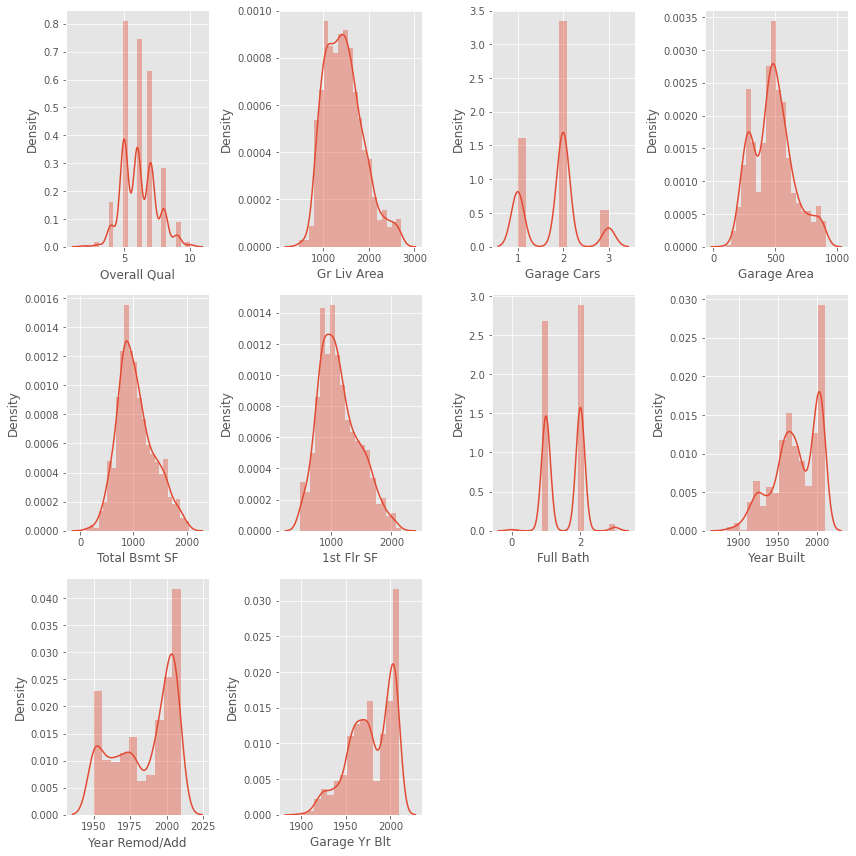

In [76]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(12,12))
for i,colName in enumerate(num):
  plt.subplot(3,4,i+1)
  sns.distplot(train.loc[:,colName])
plt.tight_layout()
plt.show()

딱히 치우쳐진게 없어서 그냥 안하기로 했다.

### 4) StandardScaler

## 파생변수 만들기

- 리모델링 연도-완공연도
- 지상층 넓이>1층 넓이, 지상층=1층, 지상층<1층
- 

### 1) 지상층 넓이>1층 넓이, 지상층=1층, 지상층<1층

In [77]:
print(sum(train['Total Bsmt SF']>train['1st Flr SF']))
print(sum(train['Total Bsmt SF']==train['1st Flr SF']))
print(sum(train['Total Bsmt SF']<train['1st Flr SF']))

print(train['target'][train['Total Bsmt SF']>train['1st Flr SF']].mean())
print(train['target'][train['Total Bsmt SF']==train['1st Flr SF']].mean())
print(train['target'][train['Total Bsmt SF']<train['1st Flr SF']].mean())

34
661
566
184513.58823529413
172634.41301059
183080.85335689047


지상층 넓이가 1,2층, 차고 까지 포함하는 거 아닌가? 근데 지상층 넓이가 1층 넓이보다 작은 경우도 있어서 당황했다. 

In [78]:
train['1st Flr SF'][train['Total Bsmt SF']>train['1st Flr SF']]=-1
train['1st Flr SF'][train['Total Bsmt SF']==train['1st Flr SF']]=0
train['1st Flr SF'][train['Total Bsmt SF']<train['1st Flr SF']]=1


train.rename(columns={'1st Flr SF':'1st - Total'},inplace=True)

test['1st Flr SF'][test['Total Bsmt SF'] > test['1st Flr SF']] = -1
test['1st Flr SF'][test['Total Bsmt SF'] == test['1st Flr SF']] = 0
test['1st Flr SF'][test['Total Bsmt SF'] < test['1st Flr SF']] = 1

test.rename(columns={'1st Flr SF':'1st - Total'}, inplace=True)

In [79]:
train.columns

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st - Total',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

### 2) 연도, 리모델링

In [80]:
print(sum(train['Year Built']==train['Year Remod/Add']))
print(sum(train['Year Built']>train['Year Remod/Add']))
print(sum(train['Year Built']<train['Year Remod/Add']))



697
0
564


In [81]:
print(train['target'][train['Year Built'] < train['Year Remod/Add']].mean())
print(train['target'][train['Year Built'] == train['Year Remod/Add']].mean())

175157.87943262412
179654.9899569584


In [82]:
train['Year Remod/Add'][train['Year Built'] < train['Year Remod/Add']] = -1
train['Year Remod/Add'][train['Year Built'] == train['Year Remod/Add']] = 1
train.rename(columns={'Year Remod/Add':'Remod'}, inplace=True)

In [83]:
test['Year Remod/Add'][test['Year Built'] < test['Year Remod/Add']] = -1
test['Year Remod/Add'][test['Year Built'] == test['Year Remod/Add']] = 1
test.rename(columns={'Year Remod/Add':'Remod'}, inplace=True)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 1 to 1349
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             1261 non-null   int64   
 1   Overall Qual   1261 non-null   int64   
 2   Gr Liv Area    1261 non-null   int64   
 3   Exter Qual     1261 non-null   category
 4   Garage Cars    1261 non-null   int64   
 5   Garage Area    1261 non-null   int64   
 6   Kitchen Qual   1261 non-null   category
 7   Total Bsmt SF  1261 non-null   int64   
 8   1st - Total    1261 non-null   int64   
 9   Bsmt Qual      1261 non-null   category
 10  Full Bath      1261 non-null   int64   
 11  Year Built     1261 non-null   int64   
 12  Remod          1261 non-null   int64   
 13  Garage Yr Blt  1261 non-null   int64   
 14  target         1261 non-null   int64   
dtypes: category(3), int64(12)
memory usage: 132.4 KB


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             1350 non-null   int64   
 1   Overall Qual   1350 non-null   int64   
 2   Gr Liv Area    1350 non-null   int64   
 3   Exter Qual     1350 non-null   category
 4   Garage Cars    1350 non-null   int64   
 5   Garage Area    1350 non-null   int64   
 6   Kitchen Qual   1350 non-null   category
 7   Total Bsmt SF  1350 non-null   int64   
 8   1st - Total    1350 non-null   int64   
 9   Bsmt Qual      1350 non-null   category
 10  Full Bath      1350 non-null   int64   
 11  Year Built     1350 non-null   int64   
 12  Remod          1350 non-null   int64   
 13  Garage Yr Blt  1350 non-null   int64   
dtypes: category(3), int64(11)
memory usage: 120.7 KB


In [86]:
train.select_dtypes('int').columns.tolist()

['id',
 'Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 '1st - Total',
 'Full Bath',
 'Year Built',
 'Remod',
 'Garage Yr Blt',
 'target']

In [87]:
num=['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 '1st - Total',
 'Full Bath',
 'Year Built',
 'Remod',
 'Garage Yr Blt']

In [88]:
from sklearn.preprocessing import StandardScaler

min=StandardScaler()
for col in num:
  train[col]=min.fit_transform(train[col].values.reshape(-1,1))
  test[col]=min.transform(test[col].values.reshape(-1,1))

display(train.head())
print()
display(test.head())


,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st - Total,Bsmt Qual,Full Bath,Year Built,Remod,Garage Yr Blt,target
1,2,0.694928,-0.250296,4,0.323241,-0.083236,4,0.876797,-0.773066,5,0.873314,1.160321,-1.111672,1.147816,194000
2,3,-0.878330,-1.322032,3,-1.354152,-1.162434,3,-0.528581,1.059333,3,-0.993210,-0.195975,0.899546,-0.434614,123000
3,4,-0.878330,-0.672351,3,0.323241,0.583683,4,-1.058478,-0.773066,3,-0.993210,-2.526022,-1.111672,0.904365,135000
5,6,1.481558,1.210299,4,2.000633,1.214226,5,-0.787770,-0.773066,5,0.873314,1.264652,-1.111672,1.269541,269500
6,7,-0.091701,0.048462,3,0.323241,-0.228746,3,1.239661,-0.773066,3,-0.993210,-0.543743,0.899546,-0.840365,156500


,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st - Total,Bsmt Qual,Full Bath,Year Built,Remod,Garage Yr Blt
0,1,2.268187,0.811955,4,0.323241,1.347610,5,2.166980,-0.773066,5,0.873314,1.195098,0.899546,1.188391
1,2,-0.091701,-0.890492,3,-1.354152,-1.453453,3,0.099231,-0.773066,3,-0.993210,-0.856734,-1.111672,-1.205541
2,3,-0.091701,0.273716,4,0.323241,-0.240872,4,-0.839607,1.059333,4,0.873314,0.951660,0.899546,0.904365
3,4,-0.091701,2.336569,4,2.000633,1.602252,4,0.318101,-0.773066,4,0.873314,1.090768,0.899546,1.066666
4,5,-0.878330,-0.990078,3,0.323241,1.250603,3,-0.021724,-0.773066,3,-0.993210,-0.161198,0.899546,0.539189


## 데이터 나눠주기


In [89]:
for i in cat:
  train[i]=train[i].astype('int')
  test[i]=test[i].astype('int')

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 1 to 1349
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1261 non-null   int64  
 1   Overall Qual   1261 non-null   float64
 2   Gr Liv Area    1261 non-null   float64
 3   Exter Qual     1261 non-null   int64  
 4   Garage Cars    1261 non-null   float64
 5   Garage Area    1261 non-null   float64
 6   Kitchen Qual   1261 non-null   int64  
 7   Total Bsmt SF  1261 non-null   float64
 8   1st - Total    1261 non-null   float64
 9   Bsmt Qual      1261 non-null   int64  
 10  Full Bath      1261 non-null   float64
 11  Year Built     1261 non-null   float64
 12  Remod          1261 non-null   float64
 13  Garage Yr Blt  1261 non-null   float64
 14  target         1261 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 157.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns 

In [90]:
X_train=train.drop(['target','id'],axis=1)
y_train=train['target']
X_test=test.drop('id',axis=1)

In [91]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1261, 13)
(1261,)
(1350, 13)


In [92]:
X_train.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st - Total,Bsmt Qual,Full Bath,Year Built,Remod,Garage Yr Blt
1,0.694928,-0.250296,4,0.323241,-0.083236,4,0.876797,-0.773066,5,0.873314,1.160321,-1.111672,1.147816
2,-0.878330,-1.322032,3,-1.354152,-1.162434,3,-0.528581,1.059333,3,-0.993210,-0.195975,0.899546,-0.434614
3,-0.878330,-0.672351,3,0.323241,0.583683,4,-1.058478,-0.773066,3,-0.993210,-2.526022,-1.111672,0.904365
5,1.481558,1.210299,4,2.000633,1.214226,5,-0.787770,-0.773066,5,0.873314,1.264652,-1.111672,1.269541
6,-0.091701,0.048462,3,0.323241,-0.228746,3,1.239661,-0.773066,3,-0.993210,-0.543743,0.899546,-0.840365


## 모델 학습 및 예측

In [93]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

estimators=[]

rf=RandomForestRegressor()
estimators.append(rf)

xgb=XGBRegressor()
estimators.append(xgb)

etr=ExtraTreesRegressor()
estimators.append(etr)

#모듈의 파라미터들을 할당할 리스트 만들어주기
params=[]

params_rf={'n_estimators':[90,100,110,120],
           'min_samples_split':[1,2,3,4]}
params.append(params_rf)

params_xgb={'n_estimatros':[100,300,500],
            'learning_rate':[0.05,0.1,0.3],
            'max_depth':[3,5,7],
            'subsample':[0.1,0.3]}

params.append(params_xgb)

params_etr={
    'n_estimators':[50,60,70,80,90,100,110,120,130,140,150]
}
params.append(params_etr)

In [94]:
params

[{'min_samples_split': [1, 2, 3, 4], 'n_estimators': [90, 100, 110, 120]},
 {'learning_rate': [0.05, 0.1, 0.3],
  'max_depth': [3, 5, 7],
  'n_estimatros': [100, 300, 500],
  'subsample': [0.1, 0.3]},
 {'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]}]

In [95]:
estimators

[RandomForestRegressor(), XGBRegressor(), ExtraTreesRegressor()]

In [96]:
#GridsearchCV를 이용해 모델 최적화

from tqdm.auto import tqdm#진행도를 확인하는 것

def gridSearchCV(models,params):
  best_models=[]

  for i in tqdm(range(0,len(models))):
    model_grid=GridSearchCV(models[i],params[i],n_jobs=-1,verbose=1,cv=5)
    model_grid.fit(X_train,y_train)
    best_models.append(model_grid.best_estimator_)
  return best_models


best_model_list=gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[08:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [97]:
best_model_list

[RandomForestRegressor(min_samples_split=4),
 XGBRegressor(learning_rate=0.05, max_depth=5, n_estimatros=100, subsample=0.3),
 ExtraTreesRegressor(n_estimators=150)]

In [99]:
best_models=[
    ('rf',RandomForestRegressor(min_samples_split=4)),
    ('xgb',XGBRegressor(learning_rate=0.05, max_depth=5, n_estimatros=100, subsample=0.3)),
    ('ex',ExtraTreesRegressor(n_estimators=150))
]

from sklearn.ensemble import VotingRegressor

voting_rg=VotingRegressor(estimators=best_models)
voting_rg.fit(X_train,y_train)

[08:28:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('rf', RandomForestRegressor(min_samples_split=4)),
                            ('xgb',
                             XGBRegressor(learning_rate=0.05, max_depth=5,
                                          n_estimatros=100, subsample=0.3)),
                            ('ex', ExtraTreesRegressor(n_estimators=150))])

In [101]:
pred=voting_rg.predict(X_test)

sample=sample.copy()
sample['target']=pred
sample.to_csv('sample.csv',index=False)